##TASK-2- Stock Market Prediction And Forecasting Using Stacked LSTM



**Import** **necessary** **libraries**



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

**Analysing** **Dataset**

In [2]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset = pd.read_csv(url)
training_set = dataset.iloc[:, 1:2].values

In [3]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Normlization** **of** **Data**

In [5]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

**Data** **visualization**

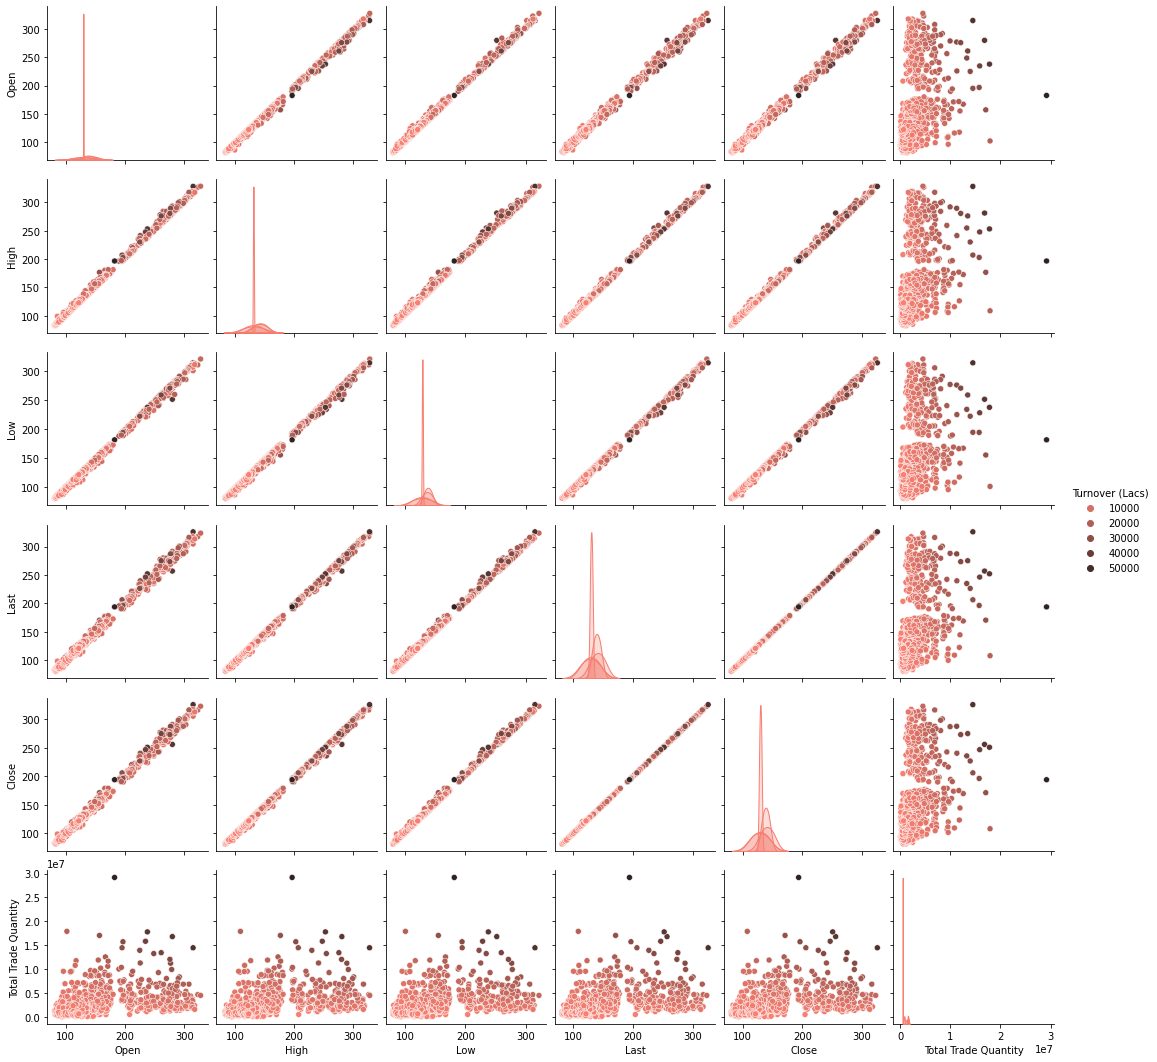

In [7]:
sns.pairplot(dataset, hue= 'Turnover (Lacs)', palette= "dark:salmon_r")
plt.show()

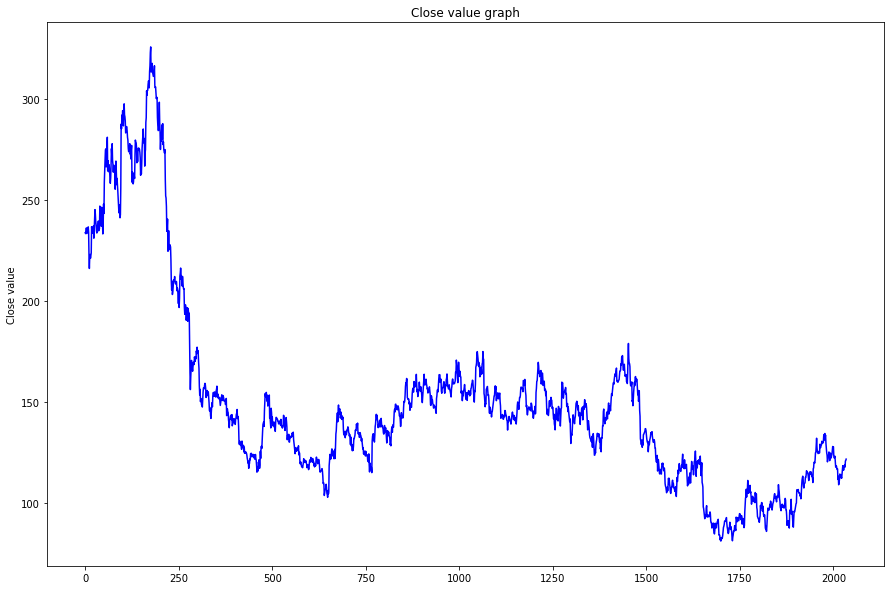

In [8]:
closing_set = dataset.reset_index()['Close']
plt.figure(figsize=(15,10))
plt.plot(closing_set, c= "b")
plt.ylabel("Close value")
plt.title('Close value graph')
plt.show()

**Model** **Creation**

In [9]:
X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [10]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
62/62 [==============================] - 15s 121ms/step - loss: 0.0092
Epoch 2/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 7s 116ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0026
Epoch 5/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0022
Epoch 6/100
62/62 [==============================] - 9s 148ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 8s 133ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 15s 240ms/step - loss: 0.0027
Epoch 9/100
62/62 [==============================] - 7s 120ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 11/100
62/62 [==============================] - 7s 118ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 7s 117ms/step - loss: 0.0020
Epoch 13/10

**Testing** **Model**

In [11]:
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

In [12]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


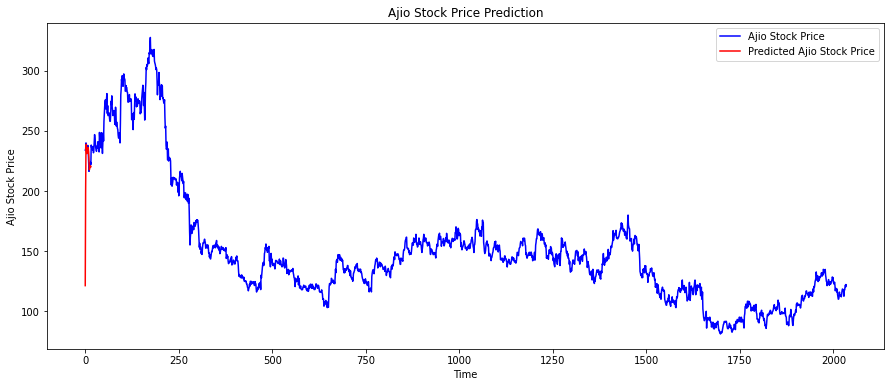

In [13]:
plt.figure(figsize=(15,6))
plt.plot(real_stock_price, color = 'blue', label = 'Ajio Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Ajio Stock Price')
plt.title('Ajio Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Ajio Stock Price')
plt.legend()
plt.show()